# Lesson 07: pandas 짧게정리

최규빈  
2023-07-24

<a href="https://colab.research.google.com/github/guebin/IP2023WIN/blob/main/posts/Day1/03_Pandas/2023-01-30-Lesson8.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# pandas 개발동기

## 부분 데이터 꺼내기: 판다스를 왜 써야할까?

`-` 예시1: 때로는 인덱스로 때로는 key로 데이터를 부르고 싶다.

In [ ]:
np.random.seed(43052)
att = np.random.choice(np.arange(10,21)*5,20)
rep = np.random.choice(np.arange(5,21)*5,20)
mid = np.random.choice(np.arange(0,21)*5,20)
fin = np.random.choice(np.arange(0,21)*5,20)
key = ['2022-12'+str(s) for s in np.random.choice(np.arange(300,501),20,replace=False)]

학번 ’2022-12363’에 해당하는 학생의 출석점수를 알고 싶다면?

(풀이1) – dct로 자료를 저장하고 출력

In [ ]:
dct = {'att':{key[i]:att[i] for i in range(20)}, 
       'rep':{key[i]:rep[i] for i in range(20)}, 
       'mid':{key[i]:mid[i] for i in range(20)}, 
       'fin':{key[i]:fin[i] for i in range(20)}}
#dct

In [ ]:
dct['att']['2022-12363']

(풀이2) – ndarray로 자료를 저장하고 출력

In [ ]:
arr = np.array([att,rep,mid,fin,key]).T
arr

In [ ]:
arr[arr[:,-1] == '2022-12363',0] # 읽기어려운 코드

**(풀이2)가 (풀이1)에 비하여 불편한 점**

-   arr 마지마칼럼이 student id 이고 첫번째 칼럼은 att라는 사실을
    암기하고 있어야 한다.
-   자료형이 문자로 강제로 바뀌어서 저장되어있음
-   작성한 코드의 가독성이 없다. (위치로 접근하기 때문)

`-` 요약: hash 스타일로 정보를 추출하는 것이 유용할 때가 있다. 그리고
보통 hash 스타일로 정보를 뽑는 것이 유리하다. (사실 numpy는 정보추출을
위해 개발된 자료형이 아니라 행렬 및 벡터의 수학연산을 지원하기 위해
개발된 자료형이다)

`-` 소망: 정보를 추출할때는 hash 스타일도 유용하다는 것은 이해함 $\to$
하지만 나는 가끔 넘파이스타일로 정보를 뽑고 싶은걸? 그리고 딕셔너리
형태가 아니고 엑셀처럼(행렬처럼) 데이터를 보고 싶은걸? $\to$ pandas의
개발

## 엑셀처럼 데이터를 테이블 형태로 정리하고 싶다

(방법1) – 넘파이

In [ ]:
arr

(방법2) – 판다스 with stacked dict

In [ ]:
df = pd.DataFrame(dct)
df.head()

(방법3) – 판다스 with index

In [ ]:
df = pd.DataFrame({'att':att,'rep':rep,'mid':mid,'fin':fin},index=key)
df.head()

## 해싱으로 원하는 정보를 뽑으면 좋겠다 (마치 딕셔너리처럼)

`-` 예제1: 출석점수를 출력 (딕셔너리가 되면 판다스도 된다)

In [ ]:
# dct['att']
df['att']

`-` 예제2: 학번 `2022-12380` 의 출석점수 출력

In [ ]:
#dct['att']['2022-12380']
df['att']['2022-12380']

## 인덱싱으로 정보를 뽑는 기능도 지원을 하면 좋겠다 (마치 리스트나 넘파이처럼)

`-` 예제1: 첫번째 학생의 기말고사 성적을 출력하고 싶다.

In [ ]:
df.iloc[0,-1]

-   벼락치기: df에서 iloc이라는 특수기능을 이용하면 넘파이 인덱싱처럼
    원소출력이 가능하다.

> df는 딕셔너리 같은것이지만 df.iloc은 넘파이같은것이라고 생각하면 된다.

`-` 예제2: 홀수번째 학생 의 점수를 뽑고 싶다. (홀수번째 학생은 인덱스
0,2,4,… 에 대응)

In [ ]:
df.iloc[::2,:]

`-` 예제3: 맨 끝에서 3명의 점수를 출력하고 싶다.

In [ ]:
df.iloc[-3:,:]

`-` 예제4: 맨 끝에서 3명의 점수중 마지막 2개의 칼럼만 출력하고 싶다.

In [ ]:
df.iloc[-3:,-2:]

## 궁극: 해싱과 인덱싱을 모두 지원하는 아주 우수한 자료형을 만들고 싶음

`-` 예제1: ’mid \>= 20 and att \<60’인 학생들의 ’fin’을 출력

(방법1) query

-   데이터베이스 스타일

In [ ]:
df.query('mid>=20 and att<60')['fin']

(방법2) numpy

In [ ]:
arr[(arr[:,2].astype(dtype=np.int64) >= 20) & (arr[:,0].astype(dtype=np.int64) < 60),3]

`-` 예제2: ’중간고사점수\<기말고사점수’인 학생들의 출석점수 평균을
구하자.

In [ ]:
df.query('mid<fin')['att'].mean()

# pandas 공부 1단계

## 데이터프레임 선언

`-` 방법1: dictionary에서 만든다.

In [ ]:
pd.DataFrame({'att':[30,40,50],'mid':[50,60,70]})

In [ ]:
pd.DataFrame({'att':(30,40,50),'mid':(50,60,70)})

In [ ]:
pd.DataFrame({'att':np.array([30,40,50]),'mid':np.array([50,60,70])})

`-` 방법: 2차원 ndarray에서 만든다.

In [ ]:
np.arange(2*3).reshape(2,3)

In [ ]:
pd.DataFrame(np.arange(2*3).reshape(2,3))

## 열의 이름 부여

`-` 방법1: 딕셔너리를 통하여 만들면 딕셔너리의 key가 자동으로 열의
이름이 된다.

In [ ]:
pd.DataFrame({'att':np.array([30,40,50]),'mid':np.array([50,60,70])})

`-` 방법2: pd.DataFrame()의 옵션에 columns를 이용

In [ ]:
pd.DataFrame(np.arange(2*3).reshape(2,3),columns=['X1','X2','X3'])

`-` 방법3: df.columns에 원하는 열이름을 덮어씀 (1)

In [ ]:
df=pd.DataFrame(np.arange(2*3).reshape(2,3))
df

In [ ]:
df.columns = ['X1','X2','X3']
df

`-` 방법4: df.columns에 원하는 열이름을 덮어씀 (2)

In [ ]:
df=pd.DataFrame(np.arange(2*3).reshape(2,3))
df

In [ ]:
df.columns = pd.Index(['X1','X2','X3'])

In [ ]:
df

방법4가 방법3의 방식보다 컴퓨터가 이해하기 좋다. (= 불필요한 에러 혹은
경고메시지를 방지할 수 있다)

## 행의 이름 부여

`-` 방법1: 중첩 dict이면 nested dic의 key가 알아서 행의 이름으로 된다.

In [ ]:
pd.DataFrame({'att':{'guebin':30, 'iu':40, 'hynn':50} , 'mid':{'guebin':5, 'iu':45, 'hynn':90}})

`-` 방법2: pd.DataFrame()의 index 옵션 이용

In [ ]:
pd.DataFrame({'att':[30,40,50] , 'mid':[5,45,90]},index=['guebin','iu','hynn'])

`-` 방법3: df.index에 덮어씌움

In [ ]:
df=pd.DataFrame({'att':[30,40,50] , 'mid':[5,45,90]})
df

In [ ]:
df.index = pd.Index(['guebin','iu','hynn'])
#df.index = ['guebin','iu','hynn'] <- 이것도 실행가능하기는함 
df

`-` 방법4: df.set_index() 를 이용하여 덮어씌운다

In [ ]:
df=pd.DataFrame({'att':[30,40,50] , 'mid':[5,45,90]})
df

In [ ]:
df.set_index(pd.Index(['guebin','iu','hynn']))

In [ ]:
df.set_index(['guebin','iu','hynn'])

In [ ]:
df.set_index([['guebin','iu','hynn']]) # 꺽쇠를 한번 더 넣어주면 에러를 피할수 있다. 

-   그러나 이런 코드를 권장하지 않음

## 자료형, len, shape, for문의 반복변수

In [ ]:
df = pd.DataFrame({'att':[30,40,50],'mid':[5,45,90]})
df

`-` type

In [ ]:
type(df)

`-` len

In [ ]:
len(df) # row의 갯수 

`-` shape

In [ ]:
df.shape 

`-` for문의 반복변수

In [ ]:
for k in df:
    print(k) # 딕셔너리같죠

att
mid

In [ ]:
for k in {'att':[30,40,50],'mid':[5,45,90]}: 
    print(k)

att
mid

**참고:** df는 진짜 딕셔너리 느낌 강해요

In [ ]:
df.keys()

In [ ]:
for k,v in df.items():
    print(k)

att
mid

## pd.Series

`-` 2차원 ndarray가 pd.DataFrame에 대응한다면 1차원 ndarray는
pd.Series에 대응한다.

In [ ]:
a=pd.Series(np.random.randn(10))
a

In [ ]:
type(a)

In [ ]:
len(a)

In [ ]:
a.shape

In [ ]:
for value in a: 
    print(value)

0.10617283591748639
0.7237590624253404
0.21798967912700873
0.1940223087322443
-0.6889899757985083
-0.3516696436204985
0.9909329773184973
1.2121468150185186
-0.6089654373693767
0.03254898346416765

# pandas 공부 2단계

`-` 데이터

In [ ]:
np.random.seed(43052)
att = np.random.choice(np.arange(10,21)*5,20)
rep = np.random.choice(np.arange(5,21)*5,20)
mid = np.random.choice(np.arange(0,21)*5,20)
fin = np.random.choice(np.arange(0,21)*5,20)
key = ['2022-12'+str(s) for s in np.random.choice(np.arange(300,501),20,replace=False)]

In [ ]:
df = pd.DataFrame({'att':att,'rep':rep,'mid':mid,'fin':fin},index=key)
df.head()

## 열의 선택

`-` 방법1: `df[]` + 칼럼이름, 칼럼이름의 list

In [ ]:
# df['att'] # 칼럼이름 
# df[['att']] # 칼럼이름의 list 
# df[['att','rep']] # 칼럼이름의 list 

`-` 방법2: `df.iloc[:,]` + 정수, 정수의 list, range, 슬라이싱,
스트라이딩, bool의 list

In [ ]:
# df.iloc[:,0] # 정수
# df.iloc[:,[0]] # 정수의 list 
# df.iloc[:,[0,1]] # 정수의 list 
# df.iloc[:,range(2)] # range
# df.iloc[:,-2:] # 슬라이싱
# df.iloc[:,1::2] # 스트라이딩
# df.iloc[:,[True,True,False,False]] # bool의 list 

`-` 방법3: `df.loc[:,]` + 칼럼이름, 컬럼이름의 list, 칼럼이름으로
슬라이싱($\star$), 칼럼이름으로 스트라이딩($\star$), bool의 list

In [ ]:
# df.loc[:,'att'] # 칼럼이름
# df.loc[:,['att']] # 칼럼이름의 list 
# df.loc[:,['att','rep']] # 칼럼이름의 list 
# df.loc[:,'rep':'mid'] # 칼럼이름으로 슬라이싱 
# df.loc[:,'rep'::2] # 칼럼이름으로 스트라이딩
# df.loc[:,[True,False,False,True]] # bool의 list

## 행의 선택

**여기서는 `df=중첩된list` 라고 생각해야 코드가 잘 읽힌다.**

`-` 방법1: `df.iloc[]` + 정수, 정수의리스트, range, 슬라이싱,
스트라이딩, bool의 list

In [ ]:
# df.iloc[0] # 정수 
# df.iloc[[0]] # 정수의 list 
# df.iloc[[0,1]] # 정수의 list 
# df.iloc[range(2)] # range
# df.iloc[-2:] # 슬라이싱
# df.iloc[1::2] # 스트라이딩
# df.iloc[[True]+[False]*19] # bool의 list 
# df.iloc[list(df['att']>70)] # bool의 list 

**여기서는 `df=2차원array`라고 생각해야 코드가 잘 읽힌다.**

`-` 방법1: `df.iloc[,:]` + 정수, 정수의리스트, range, 슬라이싱,
스트라이딩, bool의 list

In [ ]:
# df.iloc[0,:] # 정수 
# df.iloc[[0],:] # 정수의 list 
# df.iloc[[0,1],:] # 정수의 list 
# df.iloc[range(2),:] # range
# df.iloc[-2:,:] # 슬라이싱
# df.iloc[1::2,:] # 스트라이딩
# df.iloc[[True]+[False]*19,:] # bool의 list 
# df.iloc[list(df['att']>70),:] # bool의 list 

`-` 방법2: `df.loc[,:]` + 인덱스이름의 리스트, 인덱스이름으로
슬라이싱($\star$), 인덱스이름으로 스트라이딩($\star$), bool의 list

In [ ]:
# df.loc['2022-12380',:] # 인덱스이름 
# df.loc[['2022-12380','2022-12370'],:] # 인덱스이름의 리스트
# df.loc['2022-12452':,:] # 인덱스이름으로 슬라이싱
# df.loc['2022-12380'::3,:] # 인덱스이름으로 스트라이딩
# df.loc[list(df['att']>70),:] # bool의 list 
# df.loc[df['att']>70,:] # bool의 list 

## 안썼으면 좋겠는 코드

`-` 제가 안쓰는 코드1:

In [ ]:
df['2022-12380':'2022-12370']

이러면 내 입장에서는 마치 아래가 동작할 것 같잖아..

In [ ]:
df['2022-12380']

`-` 제가 안쓰는 코드2: bool의 list를 사용할때 iloc은 가급적 쓰지마세요

In [ ]:
df.iloc[list(df['att']<80),:]

이러면 마치 아래도 동작할 것 같잖아..

In [ ]:
df.iloc[df['att']<80,:]

`-` 참고: 맨날 틀리는 코드

In [ ]:
df.loc['att']

# pandas 공부 3단계

`-` df자료형의 메소드를 알아보자.

## 전치

In [ ]:
arr = np.arange(2*3).reshape(2,3)
df = pd.DataFrame(arr)
df

In [ ]:
df.T

## 합

In [ ]:
df

In [ ]:
df.sum(axis=0)

In [ ]:
df.sum(axis=1)

## cumsum

In [ ]:
df

In [ ]:
df.cumsum(axis=1) 

## 형태변환

In [ ]:
df

In [ ]:
df.to_dict()

In [ ]:
df.to_numpy()

In [ ]:
df.to_numpy().tolist()

## 기타메소드.. 생략…

# pandas 공부 4단계

In [ ]:
np.random.seed(43052)
att = np.random.choice(np.arange(10,21)*5,20)
rep = np.random.choice(np.arange(5,21)*5,20)
mid = np.random.choice(np.arange(0,21)*5,20)
fin = np.random.choice(np.arange(0,21)*5,20)
key = ['2022-12'+str(s) for s in np.random.choice(np.arange(300,501),20,replace=False)]
df = pd.DataFrame({'att':att,'rep':rep,'mid':mid,'fin':fin},index=key)
df.head()

## query ($\star$)

`-` 예제1: att==90 and fin\>30

In [ ]:
df.query('att ==90 and fin >30')

`-` 예제2: att\<rep and mid\<fin

In [ ]:
df.query('att<rep and mid<fin')

`-` 예제3: att \< rep \< 80

In [ ]:
df.query('att<rep<80')

`-` 예제4: 50 \< att \<= 90 and mid \< fin

In [ ]:
df.query('50<att<=90 and mid<fin')

`-` 예제5: (mid+fin)/2 \>=60

In [ ]:
df.query('(mid+fin)/2>=60')

`-` 예제6: att \> mean(att)

In [ ]:
_mean = df['att'].mean() 
_mean 

In [ ]:
df.query('att> @_mean')

## 시계열자료

`-` 시계열자료

In [ ]:
pd.date_range('20211226',periods=10)

In [ ]:
df=pd.DataFrame(np.random.normal(size=(10,4)),columns=list('ABCD'),index=pd.date_range('20211226',periods=10))
df

`-` 예제1: 시계열자료에서의 인덱싱

In [ ]:
df.loc['2021-12-28':'2022-01-02',:]

`-` 예제3: 스트라이딩 (샘플링)

In [ ]:
df.loc[::3,:]

`-` 예제4: query를 이용한 인덱싱

In [ ]:
df.query("index <= '2021-12-30' or index=='2022-01-02'")

## 더러운 자료 (1)

***예비학습: 하나의 col을 선택하는 가장 좋은 방법***

In [ ]:
np.random.seed(43052)
att = np.random.choice(np.arange(10,21)*5,20)
rep = np.random.choice(np.arange(5,21)*5,20)
mid = np.random.choice(np.arange(0,21)*5,20)
fin = np.random.choice(np.arange(0,21)*5,20)
key = ['2022-12'+str(s) for s in np.random.choice(np.arange(300,501),20,replace=False)]
df = pd.DataFrame({'att':att,'rep':rep,'mid':mid,'fin':fin},index=key)
df.head()

`-` att 선택

In [ ]:
df.att

`-` 단점: 칼럼이름에 스페이스가 있으면 쓸 수 없음.

***예비학습끝***

------------------------------------------------------------------------

`-` 누가 자료를 아래와 같이 주었다고 하자. (엑셀특)

In [ ]:
df.columns = pd.Index(['att score', 'rep score', 'mid score', 'fin score'])
df.head()

`-` 출석점수를 뽑고 싶다면?

In [ ]:
df['att score']
# df.att score # 이코드는 실행불가능

`-` 출석점수가 90보다 작은 학생을 뽑고 싶다면?

In [ ]:
df.loc[df['att score'] < 90, :] 
# df.query('att score < 90')

`-` 그냥 컬럼이름을 바꾸고 하는것도 방법임

In [ ]:
df.columns = pd.Index([l.replace(' ','_') for l in list(df.columns)])
df.head()

In [ ]:
df.query('att_score<90')
df.att_score

`-` 그렇지만 col이름을 바꾸는게 항상 만능은 아니다.

## 개인습관

`-` row의 이름은 없는게 낫다고 생각함 // 시계열자료는 예외

In [ ]:
np.random.seed(43052)
att = np.random.choice(np.arange(10,21)*5,20)
rep = np.random.choice(np.arange(5,21)*5,20)
mid = np.random.choice(np.arange(0,21)*5,20)
fin = np.random.choice(np.arange(0,21)*5,20)
key = ['2022-12'+str(s) for s in np.random.choice(np.arange(300,501),20,replace=False)]
df = pd.DataFrame({'att':att,'rep':rep,'mid':mid,'fin':fin},index=key)
df.head()

In [ ]:
df2 = df.reset_index().rename(columns={'index':'student_id'})
df2.head()

`-` 편해

In [ ]:
#df2.loc[0,'student_id':'rep'] 
#df2.loc[[0],'student_id':'rep'] 
#df2.loc[[0,4,5],'student_id':'rep'] 
#df2.loc[range(5),'student_id':'rep'] 
#df2.loc[5::2,'student_id':'rep'] 

## 새로운 열의 추가 ($\star\star\star$)

`-` 자료

In [ ]:
np.random.seed(43052)
att = np.random.choice(np.arange(10,21)*5,20)
rep = np.random.choice(np.arange(5,21)*5,20)
mid = np.random.choice(np.arange(0,21)*5,20)
fin = np.random.choice(np.arange(0,21)*5,20)
student_id = [ '2023-12362', '2022-12471', '2023-12333', '2022-12400', '2022-12377',
               '2022-12469', '2023-12314', '2022-12363', '2023-12445', '2023-12336',
               '2023-12426', '2022-12380', '2023-12422', '2022-12488', '2022-12370',
               '2023-12443', '2022-12463', '2023-12491', '2023-12340', '2022-12312' ]
df = pd.DataFrame({'student_id':student_id,'att':att,'rep':rep,'mid':mid,'fin':fin})
df

`-` 방법1: assign을 이용한 추가

In [ ]:
df.assign(total = df.att*0.1 + df.rep*0.2 + df.mid*0.3 + df.fin*0.4) 

`-` 방법2: eval을 이용한 추가

In [ ]:
df.eval('total = att*0.1 + rep*0.2 + mid*0.3 + fin*0.4') 

`-` 방법3: `df['total']` 을 이용한 할당 // 추천X

In [ ]:
df['total'] = df.att*0.1 + df.rep*0.2 + df.mid*0.3 + df.fin*0.4
df

`-` 아래의 자료에서 입학년도를 추가하고 싶다면?

In [ ]:
np.random.seed(43052)
att = np.random.choice(np.arange(10,21)*5,20)
rep = np.random.choice(np.arange(5,21)*5,20)
mid = np.random.choice(np.arange(0,21)*5,20)
fin = np.random.choice(np.arange(0,21)*5,20)
student_id = [ '2023-12362', '2022-12471', '2023-12333', '2022-12400', '2022-12377',
               '2022-12469', '2023-12314', '2022-12363', '2023-12445', '2023-12336',
               '2023-12426', '2022-12380', '2023-12422', '2022-12488', '2022-12370',
               '2023-12443', '2022-12463', '2023-12491', '2023-12340', '2022-12312' ]
df = pd.DataFrame({'student_id':student_id,'att':att,'rep':rep,'mid':mid,'fin':fin})

In [ ]:
df.assign(year=[l.split('-')[0] for l in list(df.student_id)]).query('year=="2022"')

# Quiz

`(1)` 아래와 같은 데이터 프레임을 선언하라.

In [ ]:
from IPython.core.display import HTML 
HTML('<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>A</th>\n      <th>B</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>1</td>\n      <td>-2</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2</td>\n      <td>-3</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>3</td>\n      <td>-4</td>\n    </tr>\n  </tbody>\n</table>')

`(2)` Column을 이름을 X1, X2로 변경하라. 출력결과는 아래와 같아야 한다.

In [ ]:
from IPython.core.display import HTML 
HTML('<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>X1</th>\n      <th>X2</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>1</td>\n      <td>-2</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2</td>\n      <td>-3</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>3</td>\n      <td>-4</td>\n    </tr>\n  </tbody>\n</table>')

`(3)-(5)` 아래와 같은 자료를 고려하자.

In [ ]:
df = pd.DataFrame(np.random.normal(size=(100,5)),columns=list('ABCDE'))
df

`(3)` B,D열을 선택하라.

`(4)` 마지막 10개의 row를 출력하라.

`(5)` A,B 열의 처음 10개의 row를 출력하라.

`(6)-(9)` 아래와 같은 자료를 고려하자.

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/movie.csv')
df

`(6)` 이 데이터프레임에는 몇개의 컬럼이 있는지 count하라.

**hint**: df.columns의 len을 조사

`(7)` 데이터프레임의 컬럼이름이 c혹은 d로 시작하는 열은 몇개 있는지
세어보라.

**hint:** 아래의 코드를 관찰

In [ ]:
lst = ['color', 'director_name', 'num_critic_for_reviews', 'duration'] 
[l for l in lst if l[0]=='c' or l[0]=='d']

`(8)` 이 데이터프레임에서 ’actor’라는 단어가 포함된 열이 몇개있는지
세어보라.

`(9)` 이 데이터프레임에서 ’actor’라는 단어가 포함된 열을 출력하라.

**hint**: 아래의 코드를 관찰하라.

In [ ]:
_df = pd.DataFrame(
    np.random.randint(1,200,size=(100,2)),
    columns=['director_facebook_likes', 'actor_3_facebook_likes']
)
_df

In [ ]:
_df.loc[:,['actor' in colname for colname in _df.columns]]

------------------------------------------------------------------------

아래는 전북대 통계학과 학생들이 R과 Python을 공부한 평균 시간이다.

In [ ]:
np.random.seed(20230426)
day = ['2023-04-24(Mon)','2023-04-25(Tue)','2023-04-26(Wed)','2023-04-27(Thu)','2023-04-28(Fri)',
       '2023-05-01(Mon)','2023-05-02(Tue)','2023-05-03(Wed)','2023-05-04(Thu)','2023-05-05(Fri)',
       '2023-05-08(Mon)','2023-05-09(Tue)','2023-05-10(Wed)','2023-05-11(Thu)','2023-05-12(Fri)']
hours1 = np.random.randn(15).cumsum()*2
hours1 = hours1 - hours1.min() +1
hours2 = np.random.randn(15).cumsum()*2
hours2 = hours2 - hours2.min() +1

df = pd.DataFrame({'hours(R)':hours1, 'hours(Python)':hours2},index=day)
df

`(10)` 데이터프레임을 변형하여 아래와 같이 만들어라.

In [ ]:
#

`(11)` 4월달에 전북대학교 학생들은 R과 Python중 어떤 과목을 더 많이
공부하였는가?

`(12)` ‘월-금’ 사이의 요일중 R을 가장 열심히 공부한 요일은 어느
요일인가?

`(13)` ’월-금’사이의 요일중 Python과 R의 합계학습량이 가장 큰 요일은
어느 요일인가?

`(14)` R과 Python의 학습량 차이를 계산하고 (R-Python을 계산) maplotlib
을 이용하여 시각화하라.

(풀이)

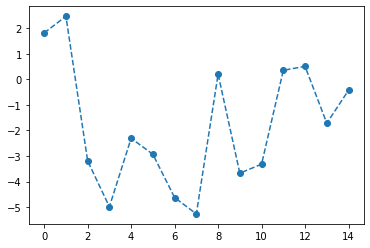

In [ ]:
# 시각화예시